In [46]:
import os
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
import more_itertools

load_dotenv()

dijkstra_natural_file = rf"{os.getenv('PROJECT_PATH')}\results\dijkstra_natural.csv"
dijkstra_reverse_file = rf"{os.getenv('PROJECT_PATH')}\results\dijkstra_reverse.csv"
dijkstra_undirected_file = rf"{os.getenv('PROJECT_PATH')}\results\dijkstra_undirected.csv"

def symmetric_bounds(percents):
  bounds = [0.5]
  for value in percents:
    v1 = round((1 - value) / 2, 5)
    v2 = 1 - v1
    bounds.append(v1)
    bounds.append(v2)
  bounds.sort()

  return bounds

def student_f_values(bounds, n, mean, std_dev):
  return [t.ppf(bound, n - 1, loc = mean, scale = std_dev ) for bound in bounds]

def linspaces(student_f_values, n):
  return [np.linspace(a, b, n) for (a, b) in more_itertools.windowed(student_f_values, 2)]

def mirrored_colors(n):
    return sns.color_palette()[:int(n/2)] + sns.color_palette()[int(n/2)-1::-1]

def diagram(bounds, linspaces, n, mean, std_dev, labels):
  colors = mirrored_colors(len(linspaces))
  ax = [sns.lineplot(x=linspace, y=t.pdf(linspace, n-1, loc=mean, scale=std_dev), color=color, label=label)
        for bound, linspace, color, label
        in zip(more_itertools.windowed(bounds, 2), linspaces, colors, labels)]
  return ax[-1]


def colorize(ax):
  colors = mirrored_colors(len(ax.lines))
  for i, line in enumerate(ax.lines):
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=colors[i], alpha=0.3)

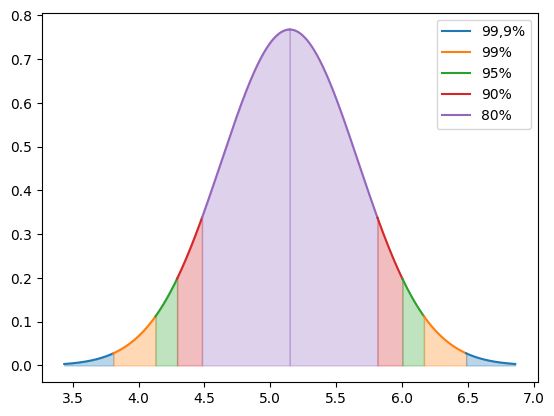

In [47]:
direction = "natural"
df = pd.read_csv(dijkstra_natural_file).assign(subset="all")

n = 3420
mean = 5.1478002289013665
std_dev = 0.5197054458596413

bound_list = symmetric_bounds([0.999, 0.99, 0.95, 0.9, 0.8])
labels = ["99,9%", "99%", "95%", "90%", "80%"] + [None] * 5
f_list = student_f_values(bound_list, n, mean, std_dev)
linspace_list = linspaces(f_list, 1000)
ax = diagram(bound_list, linspace_list, n, mean, std_dev, labels)
colorize(ax)
